<a href="https://colab.research.google.com/github/alexander-billings/food-sales-predictions/blob/master/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Reading data from public link to Google Drive
food_sales_df = pd.read_csv("https://drive.google.com/uc?id=1MDPFwAeeUclAnG4l2UdGmfyYAXSXbrSm&export=download")

# Verifying the data loaded properly
food_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [36]:
# Exploring the data set
print("Dataframe rows:   ", food_sales_df.shape[0])
print("Dataframe columns:", food_sales_df.shape[1], '\n')

print("Checking dataframe data types:")
print(food_sales_df.dtypes, '\n')

print("Checking for duplicated rows:")
print("Found", food_sales_df.duplicated().sum(), "duplicated rows\n")

print("Checking for null or missing values:")
food_sales_df.isna().sum()

Dataframe rows:    8523
Dataframe columns: 12 

Checking dataframe data types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object 

Checking for duplicated rows:
Found 0 duplicated rows

Checking for null or missing values:


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
# Checking to see if I can fill in gaps where Outlet_Size is missing by using row where
# it isn't for that Outlet_Identifier
food_sales_df.loc[: , ['Outlet_Identifier', 'Outlet_Size']].groupby("Outlet_Identifier").nunique(dropna=False)

,Outlet_Size
Outlet_Identifier,
OUT010,1
OUT013,1
OUT017,1
OUT018,1
OUT019,1
OUT027,1
OUT035,1
OUT045,1
OUT046,1


In a real-world scenario I would attempt to reach the subject matter experts regarding the data to fill in. Considering I'm unable to programmatically fill the values accuratly, I will just mark the missing sizes with "missing_size" so I could easily fill in later if possible.

In [38]:
food_sales_df['Outlet_Size'].fillna(value='missing_size', inplace=True)
food_sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [39]:
# Checking to see if I can fill in gaps where Item_Weight is missing by using row where
# it isn't for that Item_Identifier
food_sales_df.loc[: , ['Item_Identifier', 'Item_Weight']].groupby("Item_Identifier").nunique(dropna=False)

,Item_Weight
Item_Identifier,
DRA12,1
DRA24,2
DRA59,2
DRB01,2
DRB13,1
...,...
NCZ30,2
NCZ41,1
NCZ42,1


Given there are Item_Identifiers with null and non-null values, I would consider programmatically filling some of these in. In the meantime, considering some Item_Identifiers do not have weights at all, I would consider dropping the rows for now until a script can be written or a module found to use existing weights to fill missing ones.

In [40]:
food_sales_df.dropna(inplace=True)
food_sales_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [41]:
# Checking for inconsistent categories
print(food_sales_df['Item_Fat_Content'].unique())
print(food_sales_df['Item_Type'].unique())
print(food_sales_df['Outlet_Location_Type'].unique())
print(food_sales_df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Breads' 'Canned' 'Starchy Foods'
 'Others' 'Seafood']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store']


Item_Fat_Content has inconsistencies. Will replace the following:

LF, low fat = Low Fat

reg = Regular

In [42]:
food_sales_df.replace(to_replace='LF', value='Low Fat', inplace=True)
food_sales_df.replace(to_replace='low fat', value='Low Fat', inplace=True)
food_sales_df.replace(to_replace='reg', value='Regular', inplace=True)

In [43]:
# Verifying replacement
print(food_sales_df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [44]:
# Printing the min, max, and mean of numeric columns
def print_min_max_mean(column):
  print(column.name)
  print("Min: ", column.min())
  print("Max: ", column.max())
  print("Mean:", column.mean(), '\n')
  return

print_min_max_mean(food_sales_df['Item_Weight'])
print_min_max_mean(food_sales_df['Item_Visibility'])
print_min_max_mean(food_sales_df['Item_MRP'])
print_min_max_mean(food_sales_df['Outlet_Establishment_Year'])
print_min_max_mean(food_sales_df['Item_Outlet_Sales'])

# Full dataframe description
food_sales_df.describe()

Item_Weight
Min:  4.555
Max:  21.35
Mean: 12.857645184136183 

Item_Visibility
Min:  0.0
Max:  0.311090379
Mean: 0.06396338186288959 

Item_MRP
Min:  31.49
Max:  266.8884
Mean: 141.2406832577905 

Outlet_Establishment_Year
Min:  1987
Max:  2009
Mean: 2000.4909348441927 

Item_Outlet_Sales
Min:  33.29
Max:  10256.649
Mean: 2118.626808130321 



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,7060.000000,7060.000000,7060.000000,7060.000000
mean,12.857645,0.063963,141.240683,2000.490935,2118.626808
std,4.643456,0.048625,62.411888,6.588984,1533.445842
min,4.555000,0.000000,31.490000,1987.000000,33.290000
25%,8.773750,0.026768,94.143600,1997.000000,922.798800
50%,12.600000,0.052493,142.729900,2002.000000,1789.670400
75%,16.850000,0.092774,186.024000,2007.000000,2966.139000
max,21.350000,0.311090,266.888400,2009.000000,10256.649000


##Exploratory Analysis

In [45]:
print(len(food_sales_df['Item_Identifier'].unique()), 'unique item identifiers')

1555 unique item identifiers


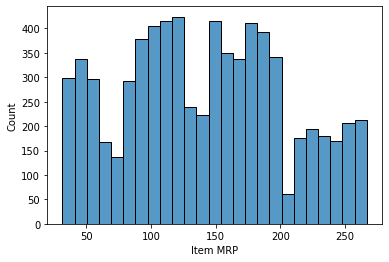

In [46]:
sns.histplot(data=food_sales_df, x='Item_MRP');
plt.xlabel('Item MRP');

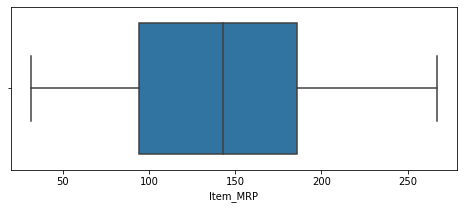

In [47]:
plt.figure(figsize=(8,3))
sns.boxplot(x=food_sales_df['Item_MRP'])

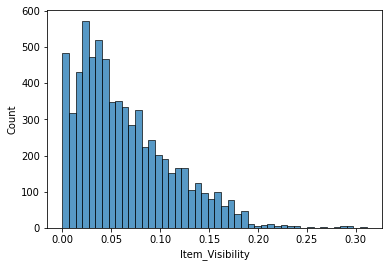

In [48]:
sns.histplot(data=food_sales_df['Item_Visibility']);

Observation: The lower the Item_Visibility metric is, the more sales are associated with it.

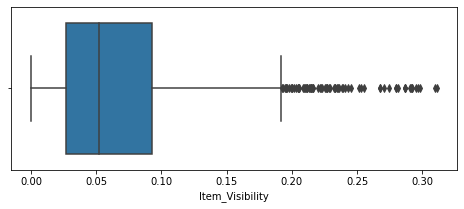

In [49]:
plt.figure(figsize=(8,3))
sns.boxplot(x=food_sales_df['Item_Visibility']);

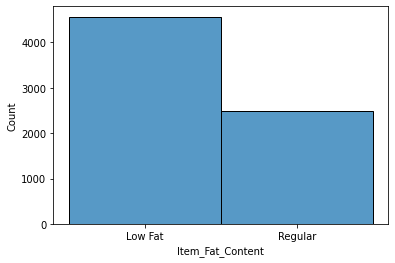

In [50]:
sns.histplot(data=food_sales_df['Item_Fat_Content']);

Observation: The majority of sales are of Low Fat items.

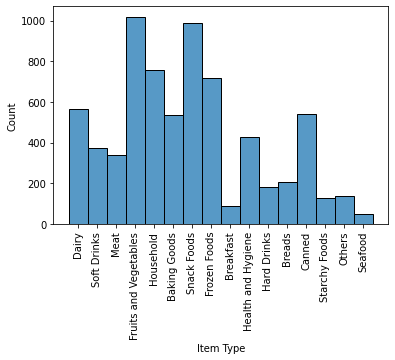

In [51]:
sns.histplot(data=food_sales_df, x='Item_Type')
plt.xlabel('Item Type')
plt.xticks(rotation=90);

Observation: It might be interesting to see a comparison of Low Fat and Regular items in Dairy or Snack Food types.

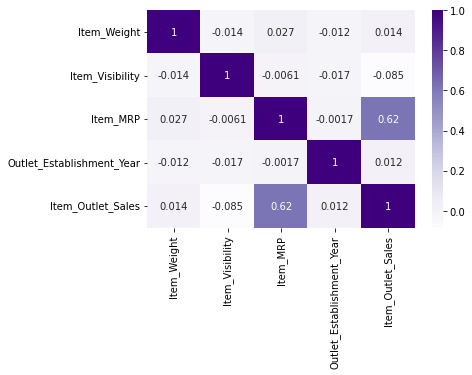

In [52]:
# First checking a heatmap to confirm some initial observations
food_sales_corr = food_sales_df.corr()
sns.heatmap(data=food_sales_corr, cmap='Purples', annot=True)


Observation: Item_MRP has a correlation to Item_Outlet_sales, might be worth exploring more

---

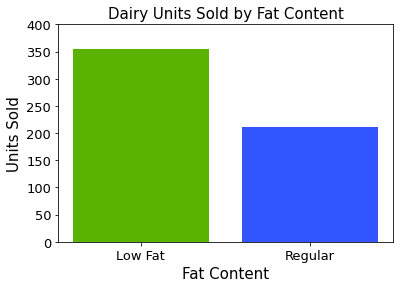

In [53]:
# Breaking down dairy sales by fat content
dairy_filter = food_sales_df['Item_Type'] == 'Dairy'
dairy_fat = food_sales_df[dairy_filter].groupby('Item_Fat_Content')['Item_Identifier'].count()

# Setting labels, title, and fontsizes
plt.title('Dairy Units Sold by Fat Content', fontsize=15)
plt.xlabel('Fat Content', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Units Sold', fontsize =15)
plt.yticks(fontsize=13)

# Giving a little extra headrom
ax = plt.gca()
ax.set_ylim([0, 400])

# Everything low-fat has green on it
colors = ['#59B300', '#3355FF']
plt.bar(data=dairy_fat, x=dairy_fat.index, height=dairy_fat.values, color=colors);

## Observation:
* It is probably worth-while to experiment with different offerings in Dairy
* People might prefer Low Fat offerings in Dairy
* Further breakdowns of sub-categories, such as cheese or ice cream, would provide more insight

---

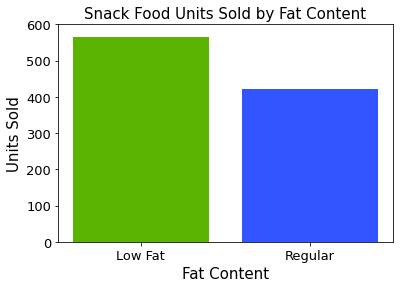

In [54]:
# Breaking down dairy sales by fat content
snack_filter = food_sales_df['Item_Type'] == 'Snack Foods'
snack_fat = food_sales_df[snack_filter].groupby('Item_Fat_Content')['Item_Identifier'].count()

# Setting labels, title, and fontsizes
plt.title('Snack Food Units Sold by Fat Content', fontsize=15)
plt.xlabel('Fat Content', fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel('Units Sold', fontsize =15)
plt.yticks(fontsize=13)

# Giving a little extra headrom
ax = plt.gca()
ax.set_ylim([0, 600])

# Everything low-fat has green on it
colors = ['#59B300', '#3355FF']
plt.bar(data=snack_fat, x=snack_fat.index, height=snack_fat.values, color=colors);

##Observation:
* Comparing the ratio of Low Fat Dairy and Regular Dairy to the ratio of Low Fat Snacks and Regular Snacks show there is a stronger correlation between Low Fat sales and Dairy products
* Low Fat is more popular in at least two item categories
* It might be worthwhile exploring applying similar inventory balances of "Healthfood" to "Regular food" to other categories to see if trend follows

---

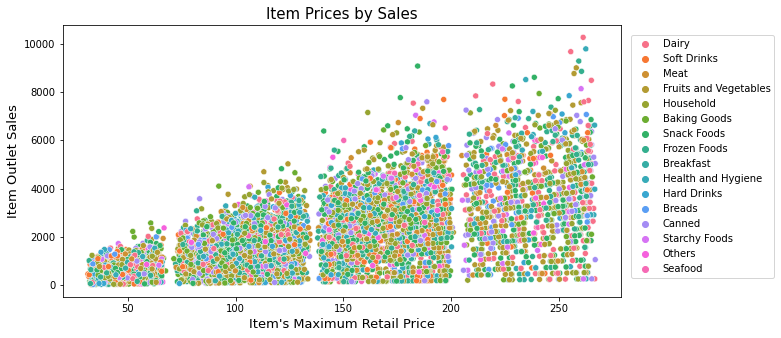

In [55]:
# Revisiting possible correlation between Item_Outlet_Sales and Item_MRP
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)

plt.xlabel('Item\'s Maximum Retail Price', fontsize=13)
plt.ylabel('Item Outlet Sales', fontsize=13)
plt.title("Item Prices by Sales", fontsize=15)
sns.scatterplot(data=food_sales_df, x='Item_MRP', y='Item_Outlet_Sales', hue='Item_Type')

plt.legend(bbox_to_anchor=(1.00, 1), loc='upper left', borderaxespad=1)

##Observation:
* Interesting bands in pricing showing, same as in earlier analysis of Item_MRP
* It is probably worthwhile to further examine the data source to determine if the currency was converted as the bands aren't lining up to expected points (99, 149, 199, etc)

# Machine Learning


In [56]:
# Importing modules that will likely be used
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Taking inventory of what might be useful 
food_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


## Features and Target
* The target will be Item_Outlet_sales as the ability to predict sales will be useful
* The identifiers will be dropped as I want to predict sales based on the item's or outlet's qualities

In [57]:
# Identifying X features and y target
X = food_sales_df.drop(columns=['Item_Identifier', 'Outlet_Identifier'])
y = food_sales_df['Item_Outlet_Sales']

# Plitting the training data from the testing data, random_state picked for consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Creating a pre-processing pipeline to prepare for machine learning

In [58]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_columns = cat_selector(X_train)
num_columns = num_selector(X_train)

print("Category columns:", cat_columns)
print("Number columns:", num_columns)

Category columns: ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Number columns: ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [66]:
# Create one_hot to handle category data and scaler to help with numerical, especially the outlet year
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

scaler_tuple = (scaler, num_selector)
ohe_tuple = (one_hot_encoder, cat_selector)

column_transformer = make_column_transformer(scaler_tuple, ohe_tuple)

preprocess_pipe = make_pipeline(column_transformer, scaler, one_hot_encoder)

In [74]:
# Fit on training data, then process X_train and X_test
preprocess_pipe.fit(X_train, y_train)
X_train_processed = preprocess_pipe.transform(X_train)
X_test_processed = preprocess_pipe.transform(X_test)


##Data Should be ready for Machine Learning now

In [76]:
X_train_processed

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [78]:
X_test_processed

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [79]:
y_train

1548     660.4736
512     4380.2982
330      306.2680
5307    3781.7440
794      505.3422
          ...    
4506     340.2238
6235    1657.8420
6277     401.4774
6470    4152.5946
1059    5712.5640
Name: Item_Outlet_Sales, Length: 5295, dtype: float64

In [80]:
y_test

8209    3075.9960
283     2277.0360
7019    2466.7890
660      113.8518
3063    3110.6176
          ...    
2098    2801.6864
8126    3520.0846
6805     882.1850
3911    5033.4480
7491    3175.8660
Name: Item_Outlet_Sales, Length: 1765, dtype: float64